In [110]:
import numpy as np
from PIL import Image
import os

path = "../data/samples/"
file = "pink.exe"
file = "b530de08530d1ba19a94bc075e74e2236c106466dedc92be3abdee9908e8cf7e"
h = w = 256

In [119]:
def resize_img(path,h=256, w=256):
    with Image.open(path) as img:
        img_arr = np.array(img)
        h2,w2 = img_arr.shape
        img_arr = list(np.reshape(img_arr, (h2*w2)))
        img_arr += [0]*(h*w - len(img_arr))
        img_arr = img_arr[:h*w]
        img_arr = np.reshape(np.array(img_arr), (h,w))
        img     = Image.fromarray(img_arr.astype('uint8'), 'L')
        display(img)

In [120]:
from math import sqrt,ceil

def extract_img(path, file, doSave=True):
    with open(path+file, 'rb') as img_set:
        img_arr = list(img_set.read())
        sq   = ceil(sqrt(len(img_arr)))
        rest = (sq*sq)-len(img_arr)
        img_arr += [0]*rest
        
        img_arr = np.array(img_arr)
        img_arr = img_arr.astype('float32')
        #img_arr /= 255
        img_arr = np.reshape(img_arr, (sq,sq))
        img = Image.fromarray(img_arr.astype('uint8'), 'L')
        
        if doSave : 
            hashed = abs(hash(file))
            hashed = str(hashed)
            if not os.path.exists(f"{path}../images"):
               os.makedirs(f"{path}../images")
            
            file_save_path = f"{path}../images/{hashed}.jpg"
            img.save(file_save_path)
            return file_save_path
        else : 
            return img

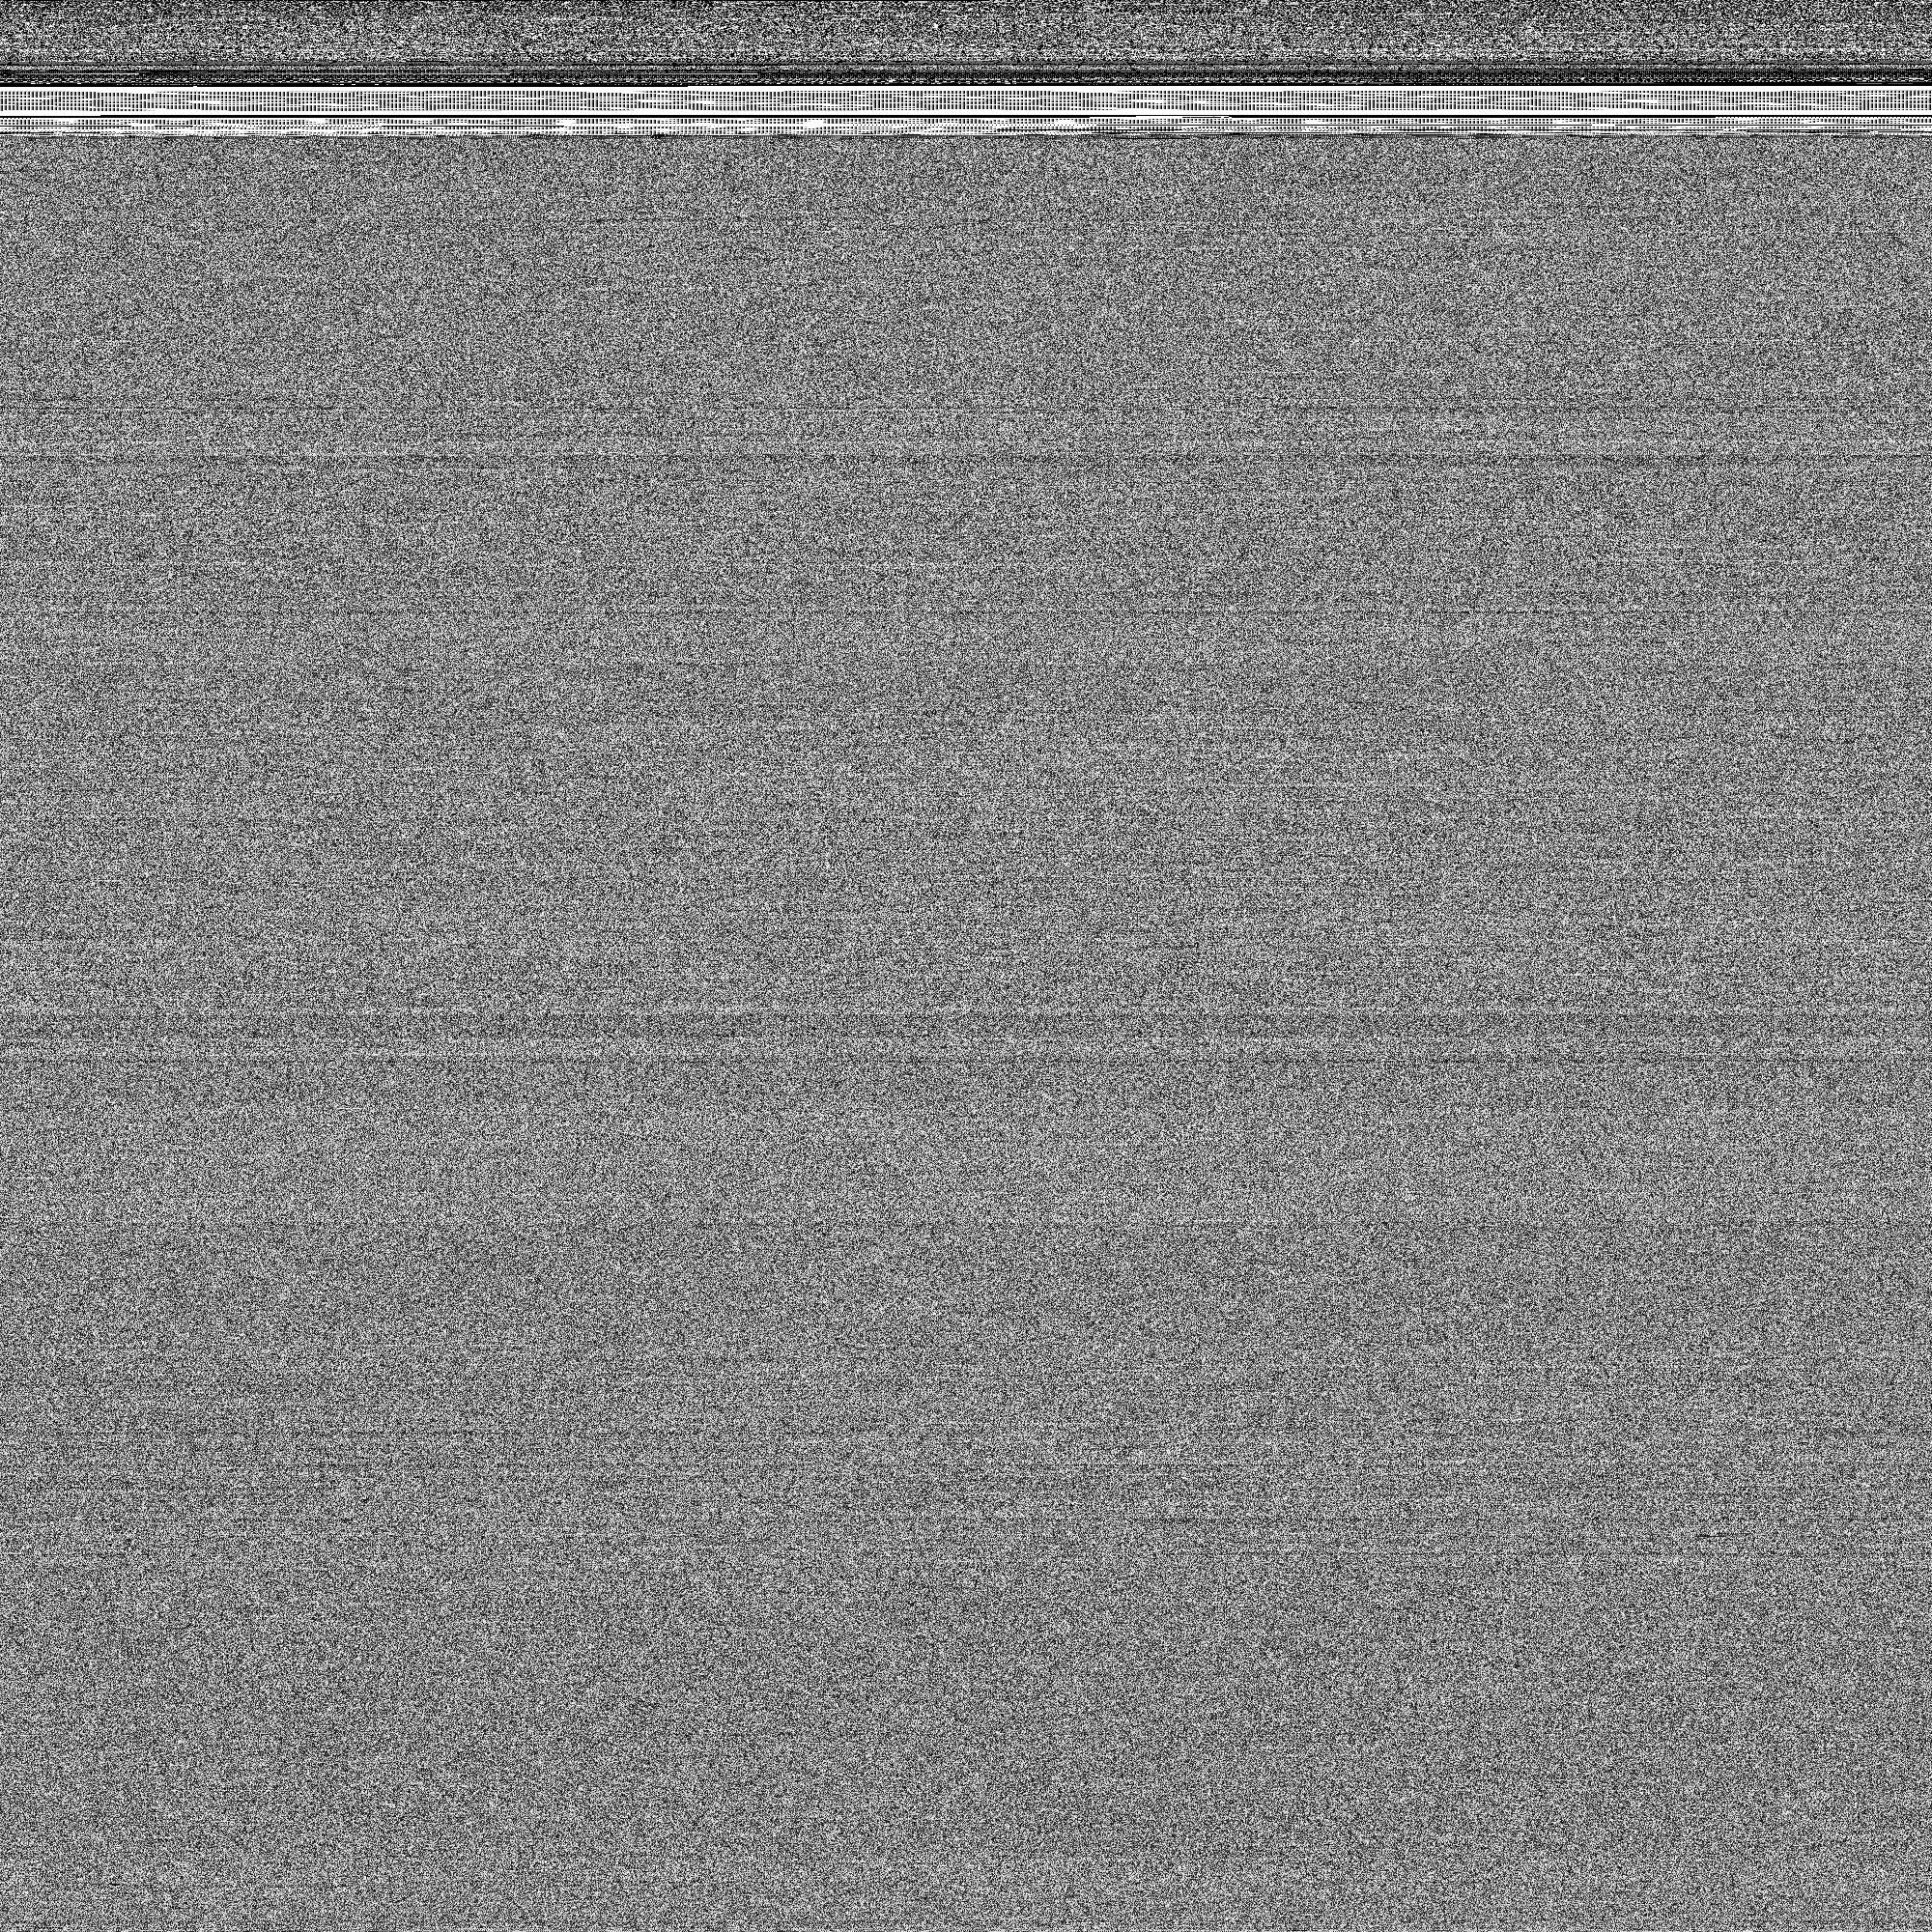

In [123]:
img = extract_img(path,file)
# display(img)
resize_img(img,2000,2000)

In [107]:
def old_extract(path, file, doSave=True,h=256, w=256):
    with open(path+file, 'rb') as img_set:
        img_arr = img_set.read(h * w)
        img_arr = list(img_arr)
        img_arr += [0]*(h*w - len(img_arr))
        img_arr = img_arr[:h*w]
        #print(h*w,len(img_arr))
        img_arr = np.array(img_arr)
        img_arr = img_arr.astype('float32')
        #img_arr /= 255
        img_arr = np.reshape(img_arr, (len(img_arr)//h, w))
        
        if doSave : 
            img = Image.fromarray(img_arr.astype('uint8'), 'L')
            hashed = abs(hash(file))
            hashed = str(hashed)
            if not os.path.exists(f"{path}../images"):
               os.makedirs(f"{path}../images")
            img.save(f"{path}../images/{hashed}.jpg")
        
        return img